# Exploratory Analysis: Kai Miller's ECoG data for motion imagery

In [80]:
from load_data import (get_all_data, get_subject_data, get_raw, get_epochs, get_mean_evokeds)

# Data from NMA
ECoG_data =  get_all_data()
# get data for 1st subject, session i.e. when real movements were done
subject_data = get_subject_data(ECoG_data, subject=0, session=0)


# convert to MNE data formats

# raw data without any event markings
raw = get_raw(subject_data)
# what event ids refer to (info not available inside sub data given, taken from readme text)
event_ids = dict(rest=10, tongue=11, hand=12)
# mark raw data and divide into separate events
epochs = get_epochs(subject_data, event_ids)
# average over each event type
evokeds = get_mean_evokeds(epochs)


Creating RawArray with float64 data, n_channels=46, n_times=376400
    Range : 0 ... 376399 =      0.000 ...   376.399 secs
Ready.
Creating RawArray with float64 data, n_channels=46, n_times=376400
    Range : 0 ... 376399 =      0.000 ...   376.399 secs
Ready.
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


In [81]:
# what do epochs look like?
print(epochs.get_data().shape)
## 119 refers to all the different trials
## 46 refers to all 46 channels
## 3001 are all the time points - 
## - with 1000 hz sampling freq, meaning each hand movement trial was 3 second long

# for one specific event type, say rest trials
print(epochs['rest'].get_data().shape)
## 59 rest trials when no movement was happening
print(epochs['tongue'].get_data().shape)
## 30 tongue movement trials
print(epochs['hand'].get_data().shape)
## 30 hand movement trials


Using data from preloaded Raw for 119 events and 3001 original time points ...
0 bad epochs dropped
(119, 46, 3001)
Using data from preloaded Raw for 59 events and 3001 original time points ...
(59, 46, 3001)
Using data from preloaded Raw for 30 events and 3001 original time points ...
(30, 46, 3001)
Using data from preloaded Raw for 30 events and 3001 original time points ...
(30, 46, 3001)


In [82]:
# what do averaged evokeds look like
print(type(evokeds))
## a list
print(len(evokeds))
## 3 evoked arrays for each event type

for i in range(len(evokeds)):
    # which one is which?
    print(evokeds[i].comment)
    # what have the epochs been averaged over? event types? channels? timepoints?
    print(evokeds[i].data.shape)
    ## 46 channels and 3001 time points still intact,
    ## meaning average was over event types

<class 'list'>
3
rest
(46, 3001)
tongue
(46, 3001)
hand
(46, 3001)


Using data from preloaded Raw for 30 events and 3001 original time points ...
(4141380,)
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...


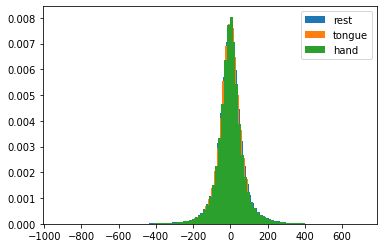

In [83]:
# let's see how the data is distributed
import numpy as np
import matplotlib.pyplot as plt

# flatten tongue data array
print(epochs['tongue'].get_data().flatten().shape)

# is there any difference in how the potentials are distributed between event types
for event_id in ['rest', 'tongue', 'hand']:
    flat_arr = epochs[event_id].get_data().flatten()*(10**6)
    plt.hist(flat_arr, bins=100, density=True, label=event_id)
plt.legend()

## no distributions look very similar

Using data from preloaded Raw for 59 events and 3001 original time points ...
(59, 3001)
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 

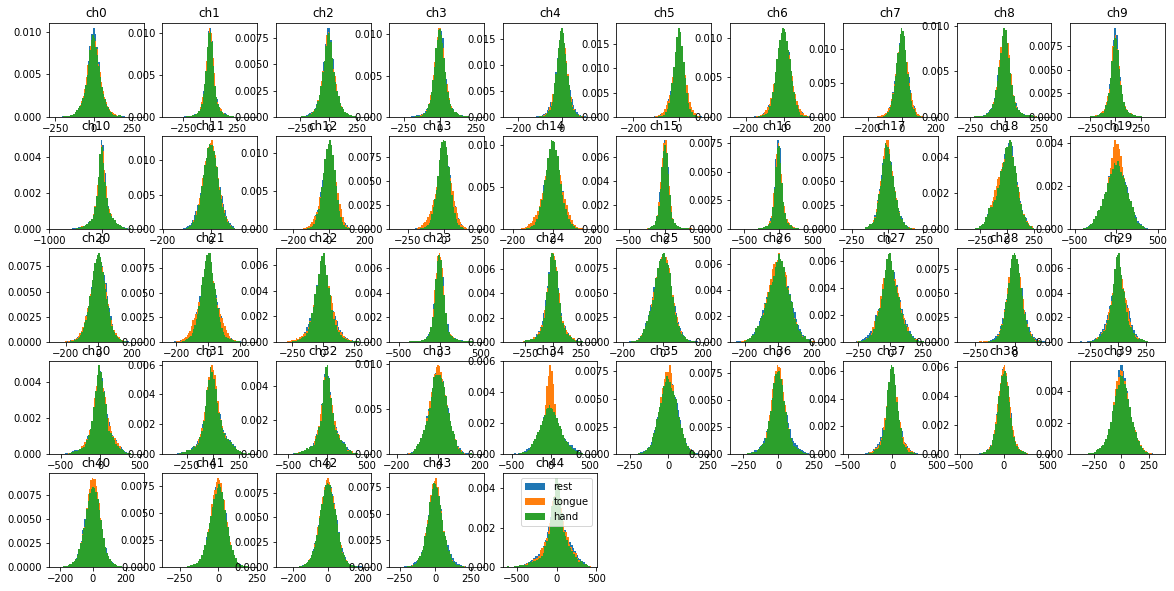

In [84]:
# maybe that's because we are plotting over all the electrodes
# some specific electrodes might have diff distribution than others for different events
# let's plot the same histo for each electrode now

print(epochs['rest'].get_data()[:,0,:].shape)

plt.figure(figsize=(20, 10))
for elect in range(0,45):
    ax = plt.subplot(5, 10, elect+1)

    for event_id in ['rest', 'tongue', 'hand']:
        flat_arr = epochs[event_id].get_data()[:,elect,:].flatten()*(10**6)
        plt.hist(flat_arr, bins=50, label=event_id, density=True)

    plt.title('ch%d'%elect)

plt.legend()

## the distributions for different event types look very similar for each electrode a well

Using data from preloaded Raw for 59 events and 3001 original time points ...
(59, 1001)
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 

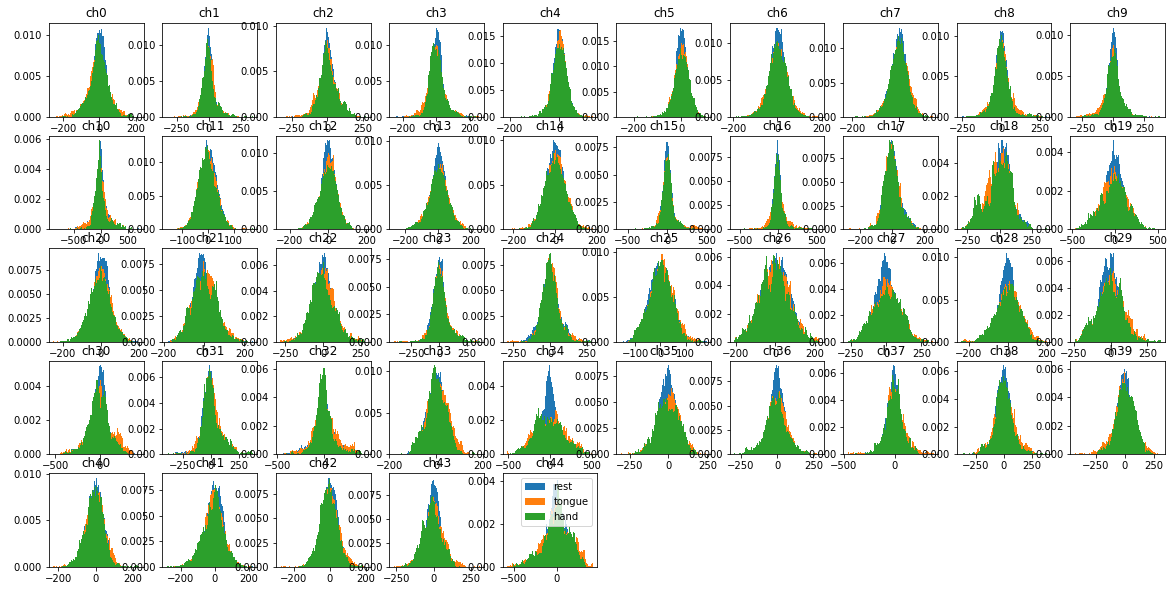

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

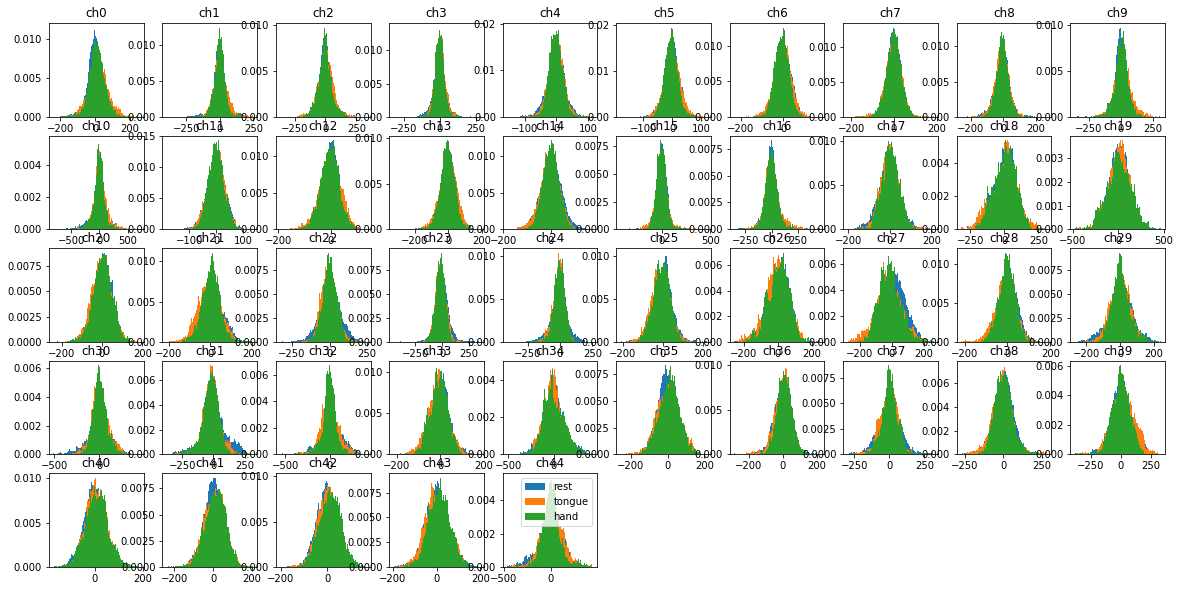

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

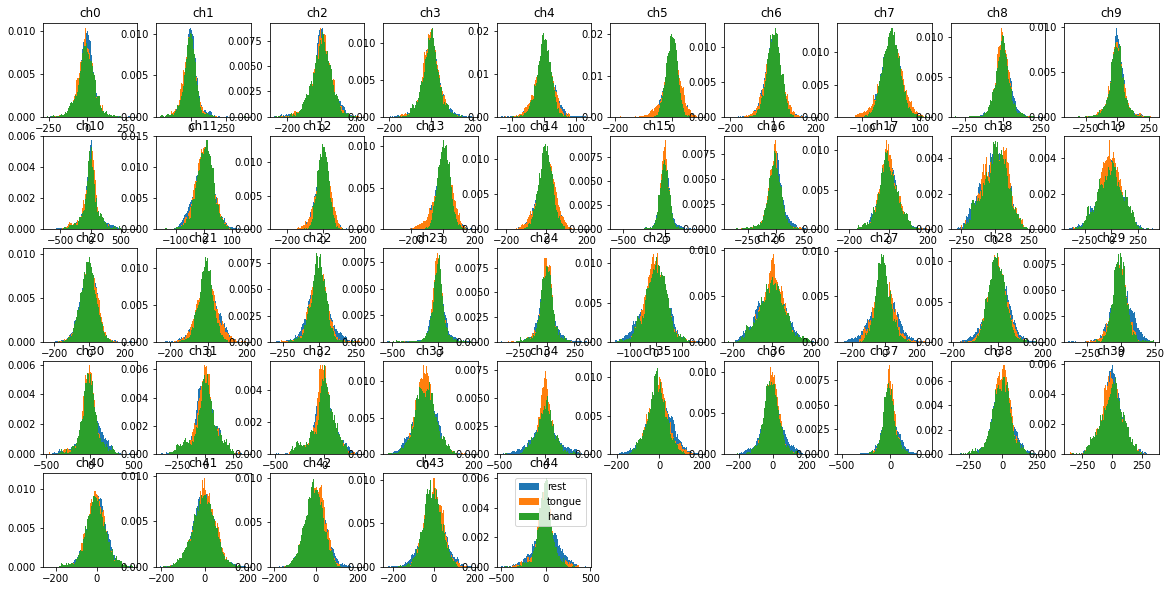

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

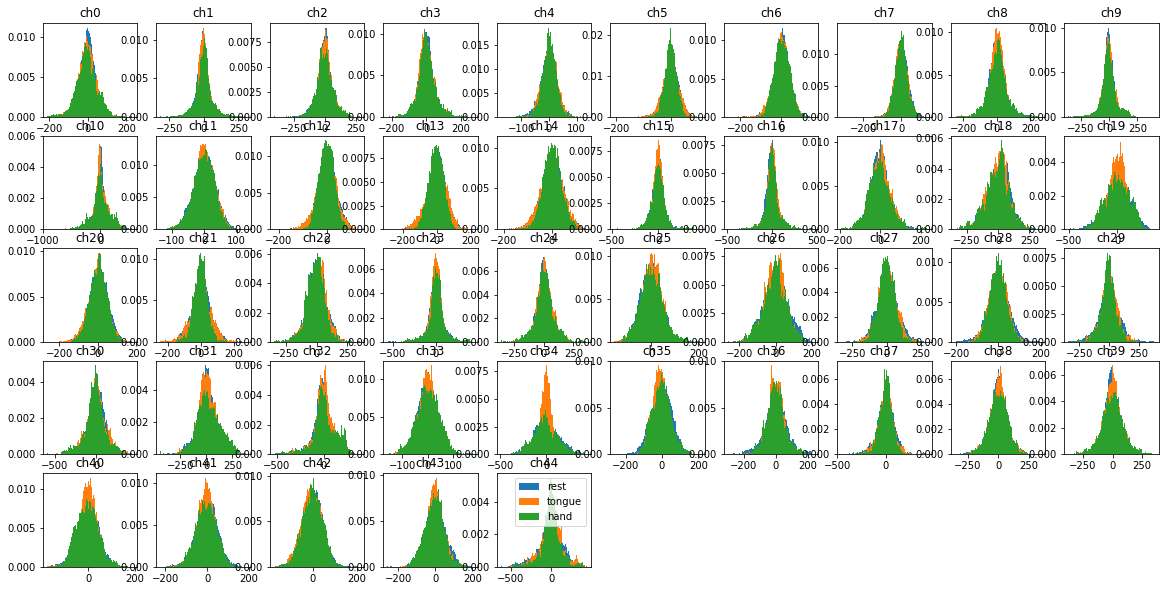

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

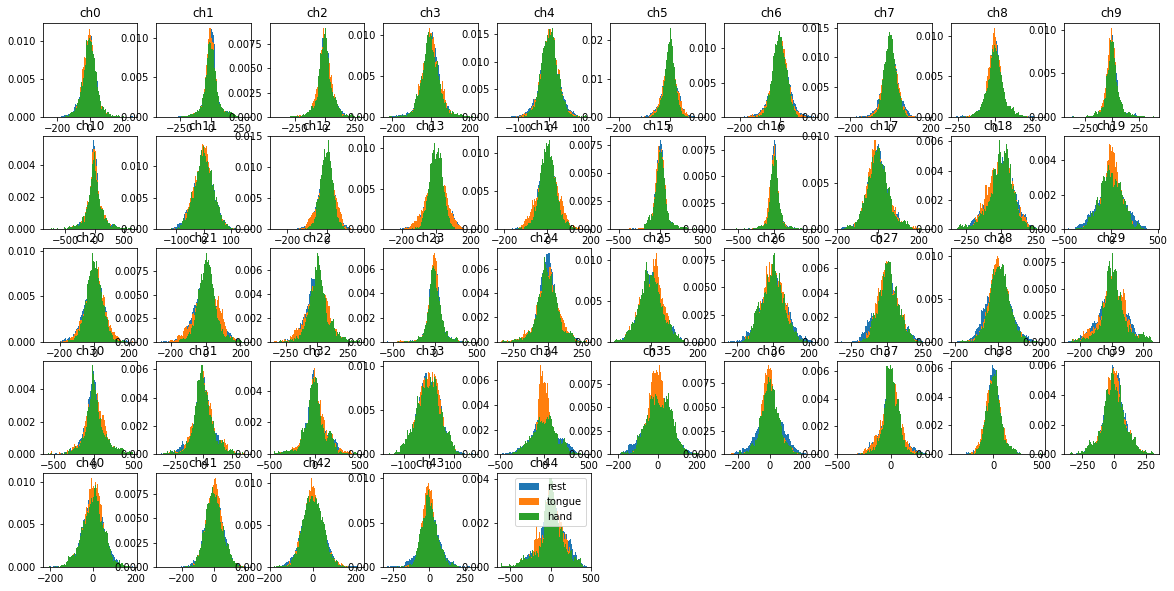

Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 30 events and 3001 original time points ...
Using data from preloaded Raw for 59 events and 3001 original ti

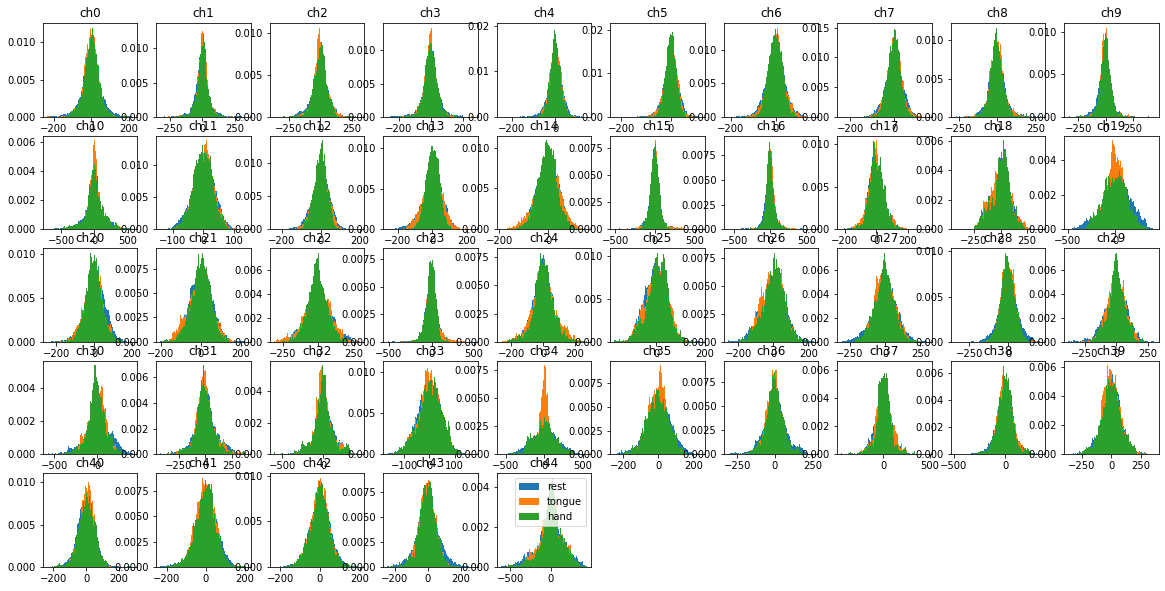

In [88]:
# maybe the potential amplitudes from diff event types were distributed differently... 
# ... during specific time intervals?

# cropping and keeping the first second
print(epochs['rest'].load_data().crop(tmin=0, tmax=1).get_data()[:,0,:].shape)

for time_range in [(0,0.5),(0.5,1),(1,1.5),(1.5,2),(2,2.5),(2.5,3)]:
    plt.figure(figsize=(20, 10))
    for elect in range(0,45):
        ax = plt.subplot(5, 10, elect+1)

        for event_id in ['rest', 'tongue', 'hand']:
            cropped = epochs[event_id].load_data().crop(tmin=time_range[0], tmax=time_range[1])
            flat_arr = cropped.get_data()[:,elect,:].flatten()*(10**6)
            plt.hist(flat_arr, bins=100, label=event_id, density=True)

        plt.title('ch%d'%elect)

    plt.legend()
    plt.show()
